# Computation points

### Brief description

This Jupyter notebook is a supplementary material contaning the code needed to generate part of the synthetic data and reproduce part of the figures and results of this course. This code uses the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://www.fatiando.org/index.html).

This code creates the horizontal coordinates of the synthetic data that are used in the numerical applications.

**Note:** A Jupyter notebook is a document that incorporates text, results, figures, and the Python source code to produce them. If you are viewing this from the URL https://nbviewer.jupyter.org/, the document will be static (not executable). To run the code, you will need to download the notebook and install all the required dependencies. For installing the Fatiando a Terra and all the required dependencies, please follow the instructions shown in http://www.fatiando.org/install.html.

### Import the required dependencies

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st

from __future__ import division

import auxiliary_functions as af

import fatiando
from fatiando import gridder
from fatiando.mesher import Prism
from fatiando.gridder import regular
from fatiando.gravmag import prism
from fatiando.vis import myv
from fatiando.utils import ang2vec, contaminate
from fatiando.constants import G

In [2]:
plt.rcParams['font.size'] = 6
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['xtick.major.pad'] = 3
plt.rcParams['ytick.major.pad'] = 3

In [3]:
notebook_name = 'computation_points.ipynb'

In [4]:
print("Version of Fatiando a Terra used: {}".format(fatiando.__version__))

Version of Fatiando a Terra used: unknown


In [5]:
saved_files = [] #list of saved files

### Load the synthetic model formed by two rectangular prisms

In [6]:
with open('results\\model.pickle') as f:
        full_model = pickle.load(f)

### 2D grid of points

#### Regular grid

In [7]:
regular_grid = dict() #empty dictionary

In [8]:
#area over which the data are calculated
#x minimum, x maximum, y minimum and y maximum
regular_grid['area'] = [0, 30000, 5000, 35000]

#number of data along the x and y directions
regular_grid['shape'] = (180,180)

#total number of data
regular_grid['N'] = regular_grid['shape'][0]*regular_grid['shape'][1]

#grid spacing along the y and x directions
regular_grid['spacing'] = gridder.spacing(regular_grid['area'], regular_grid['shape'])

#element of area used in the numerical integration
regular_grid['DS'] = regular_grid['spacing'][0]*regular_grid['spacing'][1]

In [9]:
#auxiliary informations about the grid
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
regular_grid['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [10]:
#save the grid model by using the Python pickle module (https://docs.python.org/2/library/pickle.html)
file_name = 'results\\regular_grid.pickle'
with open(file_name, 'w') as f:
    pickle.dump(regular_grid, f)
saved_files.append(file_name)

In [11]:
for r in regular_grid:
    print r, ':', regular_grid[r]

area : [0, 30000, 5000, 35000]
spacing : [167.5977653631285, 167.5977653631285]
N : 32400
shape : (180, 180)
DS : 28089.0109547
metadata : Generated by computation_points.ipynb on 19 October 2016 19:27:10 UTC


In [12]:
#coordinates x and y of the data
xr, yr = regular(regular_grid['area'], regular_grid['shape'])

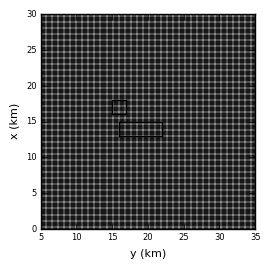

In [14]:
af.plotmap(xr, yr, None, regular_grid['shape'], regular_grid['area'], 
           color_scheme = None, unit = 'm', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'],
           observations=True, point_style='.k', point_size=1)

In [15]:
caption = "Regular grid of $%d \\times %d$ points on which we calculate the synthetic data to \
be used in the validation tests. Note that this grid is very dense." \
% (regular_grid['shape'][0], regular_grid['shape'][1])

In [16]:
dp(md(caption))

Regular grid of $180 \times 180$ points on which we calculate the synthetic data to be used in the validation tests. Note that this grid is very dense.

#### Airborn survey

In [17]:
airborne_survey = dict() #empty dictionary

In [18]:
#area over which the data are calculated
#x minimum, x maximum, y minimum and y maximum
airborne_survey['area'] = [0, 30000, 5000, 35000]

#number of data along the x and y directions
airborne_survey['shape'] = (120,30)

#total number of data
airborne_survey['N'] = airborne_survey['shape'][0]*airborne_survey['shape'][1]

#grid spacing along the y and x directions
airborne_survey['spacing'] = gridder.spacing(airborne_survey['area'], airborne_survey['shape'])

#element of area used in the numerical integration
airborne_survey['DS'] = airborne_survey['spacing'][0]*airborne_survey['spacing'][1]

In [19]:
#auxiliary informations about the grid
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
airborne_survey['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [20]:
#save the grid model by using the Python pickle module (https://docs.python.org/2/library/pickle.html)
file_name = 'results\\airborne_survey.pickle'
with open(file_name, 'w') as f:
    pickle.dump(airborne_survey, f)
saved_files.append(file_name)

In [21]:
for r in airborne_survey:
    print r, ':', airborne_survey[r]

area : [0, 30000, 5000, 35000]
spacing : [252.10084033613447, 1034.4827586206898]
N : 3600
shape : (120, 30)
DS : 260793.972762
metadata : Generated by computation_points.ipynb on 19 October 2016 19:29:19 UTC


In [22]:
#coordinates x and y of the data
xa, ya = regular(airborne_survey['area'], airborne_survey['shape'])

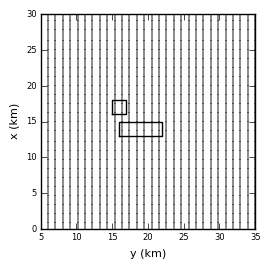

In [24]:
af.plotmap(xa, ya, None, airborne_survey['shape'], airborne_survey['area'], 
           color_scheme = 'Greys_r', unit = 'm', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'],
           observations=True, point_style='.k', point_size=1)

In [25]:
caption = "Regular grid of $%d \\times %d$ points on which we calculate the synthetic \
data to be used in the numerical tests. This grid simulates an airborne survey." \
% (airborne_survey['shape'][0], airborne_survey['shape'][1])

In [26]:
dp(md(caption))

Regular grid of $120 \times 30$ points on which we calculate the synthetic data to be used in the numerical tests. This grid simulates an airborne survey.

#### Interpolating points

In [27]:
interpolating = dict() #empty dictionary

In [28]:
#area over which the data are calculated
#x minimum, x maximum, y minimum and y maximum
interpolating['area'] = [0, 30000, 
                         5000 + 0.5*airborne_survey['spacing'][1], 
                         35000 - 0.5*airborne_survey['spacing'][1]]

#number of data along the x and y directions
interpolating['shape'] = (airborne_survey['shape'][0],
                          airborne_survey['shape'][1] - 1)

#total number of data
interpolating['N'] = interpolating['shape'][0]*airborne_survey['shape'][1]

#grid spacing along the y and x directions
interpolating['spacing'] = gridder.spacing(interpolating['area'], interpolating['shape'])

#element of area used in the numerical integration
interpolating['DS'] = interpolating['spacing'][0]*interpolating['spacing'][1]

In [29]:
#auxiliary informations about the grid
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
interpolating['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
#save the grid model by using the Python pickle module (https://docs.python.org/2/library/pickle.html)
file_name = 'results\\interpolating.pickle'
with open(file_name, 'w') as f:
    pickle.dump(interpolating, f)
saved_files.append(file_name)

In [31]:
for r in interpolating:
    print r, ':', interpolating[r]

area : [0, 30000, 5517.241379310345, 34482.75862068965]
spacing : [252.10084033613447, 1034.4827586206895]
N : 3600
shape : (120, 29)
DS : 260793.972762
metadata : Generated by computation_points.ipynb on 19 October 2016 19:29:28 UTC


In [32]:
#coordinates x and y of the data
xi, yi = regular(interpolating['area'], interpolating['shape'])

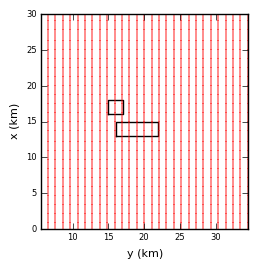

In [34]:
af.plotmap(xi, yi, None, interpolating['shape'], interpolating['area'], 
           color_scheme = 'Greys_r', unit = 'm', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'],
           observations=True, point_style='.r', point_size=1)

In [35]:
caption = "Regular grid of $%d \\times %d$ points used in the interpolation test." \
% (interpolating['shape'][0], interpolating['shape'][1])

In [36]:
dp(md(caption))

Regular grid of $120 \times 29$ points used in the interpolation test.

#### Coarse grid

In [37]:
coarse_grid = dict() #empty dictionary

In [38]:
#area over which the data are calculated
#x minimum, x maximum, y minimum and y maximum
coarse_grid['area'] = [0, 30000, 5000, 35000]

#number of data along the x and y directions
coarse_grid['shape'] = (90,90)

#total number of data
coarse_grid['N'] = coarse_grid['shape'][0]*coarse_grid['shape'][1]

#grid spacing along the y and x directions
coarse_grid['spacing'] = gridder.spacing(coarse_grid['area'], coarse_grid['shape'])

#element of area used in the numerical integration
coarse_grid['DS'] = coarse_grid['spacing'][0]*coarse_grid['spacing'][1]

In [39]:
#auxiliary informations about the grid
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
coarse_grid['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [40]:
#save the grid model by using the Python pickle module (https://docs.python.org/2/library/pickle.html)
file_name = 'results\\coarse_grid.pickle'
with open(file_name, 'w') as f:
    pickle.dump(coarse_grid, f)
saved_files.append(file_name)

In [41]:
for r in coarse_grid:
    print r, ':', coarse_grid[r]

area : [0, 30000, 5000, 35000]
spacing : [337.07865168539325, 337.07865168539325]
N : 8100
shape : (90, 90)
DS : 113622.017422
metadata : Generated by computation_points.ipynb on 19 October 2016 19:29:39 UTC


In [42]:
#coordinates x and y of the data
xc, yc = regular(coarse_grid['area'], coarse_grid['shape'])

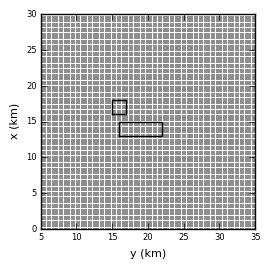

In [44]:
af.plotmap(xc, yc, None, coarse_grid['shape'], coarse_grid['area'], 
           color_scheme = None, unit = 'm', 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'],
           observations=True, point_style='.k', point_size=1)

In [45]:
caption = "Coarse grid of $%d \\times %d$ points on which we calculate the synthetic data to be used in the numerical tests." \
% (coarse_grid['shape'][0], coarse_grid['shape'][1])

In [46]:
dp(md(caption))

Coarse grid of $90 \times 90$ points on which we calculate the synthetic data to be used in the numerical tests.

### Saved files

In [47]:
with open('reports\\report_%s.md' % notebook_name[:st.index(notebook_name,'.')], 'w') as f:
    f.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    f.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        f.write('*  `%s` \n' % (sf))

1  results\regular_grid.pickle
2  results\airborne_survey.pickle
3  results\interpolating.pickle
4  results\coarse_grid.pickle
